## Delivery Time Prediction

### 1) Problem statement
- Food delivery platforms face challenges in accurately estimating delivery time, leading to poor customer experience and inefficient rider allocation.
- This project aims to analyze factors affecting delivery time and build a predictive model to improve estimation accuracy.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction/data
- The data consists of 9 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library and the CSV Data as Pandas DataFrame

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("Data/Food_Delivery_Times.csv")
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


### 2.2 Dataset information

Numerical Features
- Order ID
- Distance (km) 
- Preparation_Time_min
- Courier_Experience_yrs
- Delivery_Time_min : target variable

Categorical Features
- Weather -> Clear, Rainy, Snowy, Foggy, and Windy.
- Traffic_Level -> Low, Medium, or High.
- Time_of_Day -> Morning, Afternoon, Evening, or Night.
- Vehicle_Type ->  Bike, Scooter, and Car.


### 3. Data Cleaning 

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Exploring Data

### 3.1 Check Missing values

In [34]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [35]:
df = df.fillna({
    'Weather': df['Weather'].mode()[0],
    'Traffic_Level': df['Traffic_Level'].mode()[0],
    'Time_of_Day': df['Time_of_Day'].mode()[0],
    'Courier_Experience_yrs': df['Courier_Experience_yrs'].median()
})

In [36]:
df.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

#### Now, there are no missing values in this data set

### 3.2 Check Duplicates

In [37]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in this data set

### 3.3 Check data types

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


### 3.4 Checking the number of unique values of each column

In [22]:
df.nunique()

Order_ID                  1000
Distance_km                785
Weather                      5
Traffic_Level                3
Time_of_Day                  4
Vehicle_Type                 3
Preparation_Time_min        25
Courier_Experience_yrs      10
Delivery_Time_min          108
dtype: int64

### 3.5 Check statistics of data set

In [23]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.592000,56.732000
std,288.819436,5.696656,7.204553,2.871198,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


### 3.6 Exploring Data

In [39]:
print("Categories in Weather variable :       ",end=" " )
print(df['Weather'].unique())

print("Categories in Traffic_Level variable : ",end=" ")
print(df['Traffic_Level'].unique())

print("Categories in Time_of_Day variable :   ",end=" " )
print(df['Time_of_Day'].unique())

print("Categories in Vehicle_Type variable :  ",end=" " )
print(df['Vehicle_Type'].unique())

Categories in Weather variable :        ['Windy' 'Clear' 'Foggy' 'Rainy' 'Snowy']
Categories in Traffic_Level variable :  ['Low' 'Medium' 'High']
Categories in Time_of_Day variable :    ['Afternoon' 'Evening' 'Night' 'Morning']
Categories in Vehicle_Type variable :   ['Scooter' 'Bike' 'Car']


In [40]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Order_ID', 'Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']

We have 4 categorical features : ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize Delivery_Time_min distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

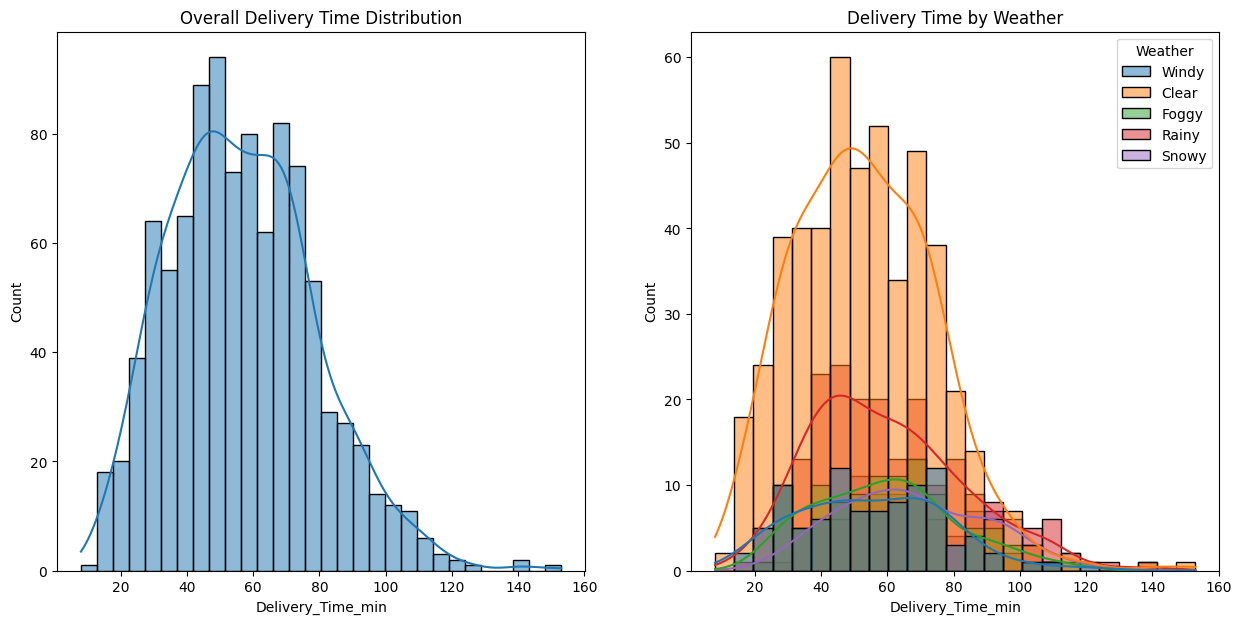

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data=df, x='Delivery_Time_min', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Overall Delivery Time Distribution')

sns.histplot(data=df, x='Delivery_Time_min', kde=True, hue='Weather', ax=axes[1])
axes[1].set_title('Delivery Time by Weather')

plt.show()

#####  Insights
- Most deliveries are completed within 30–80 minutes, with a right-skewed distribution indicating occasional long delays.
- Adverse weather conditions such as rain and snow are associated with longer and more variable delivery times compared to clear weather.

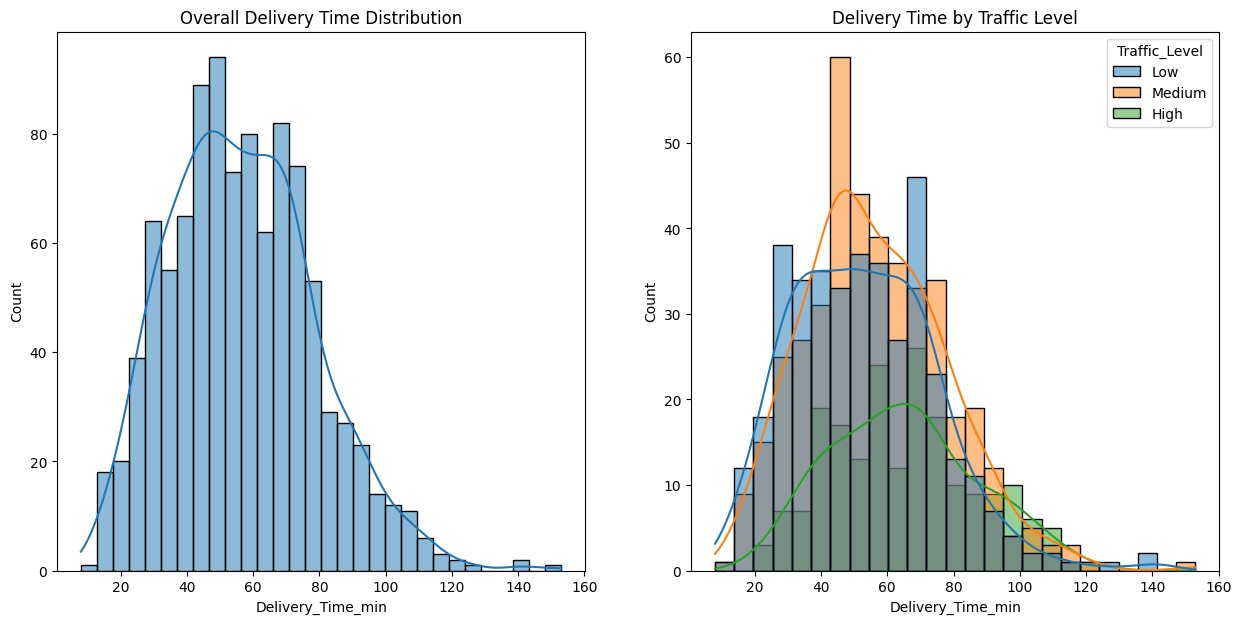

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data=df, x='Delivery_Time_min', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Overall Delivery Time Distribution')

sns.histplot(data=df, x='Delivery_Time_min', kde=True, hue='Traffic_Level', ax=axes[1])
axes[1].set_title('Delivery Time by Traffic Level')

plt.show()

#####  Insights
- High traffic level causes delivery times to be longer than Low and Medium

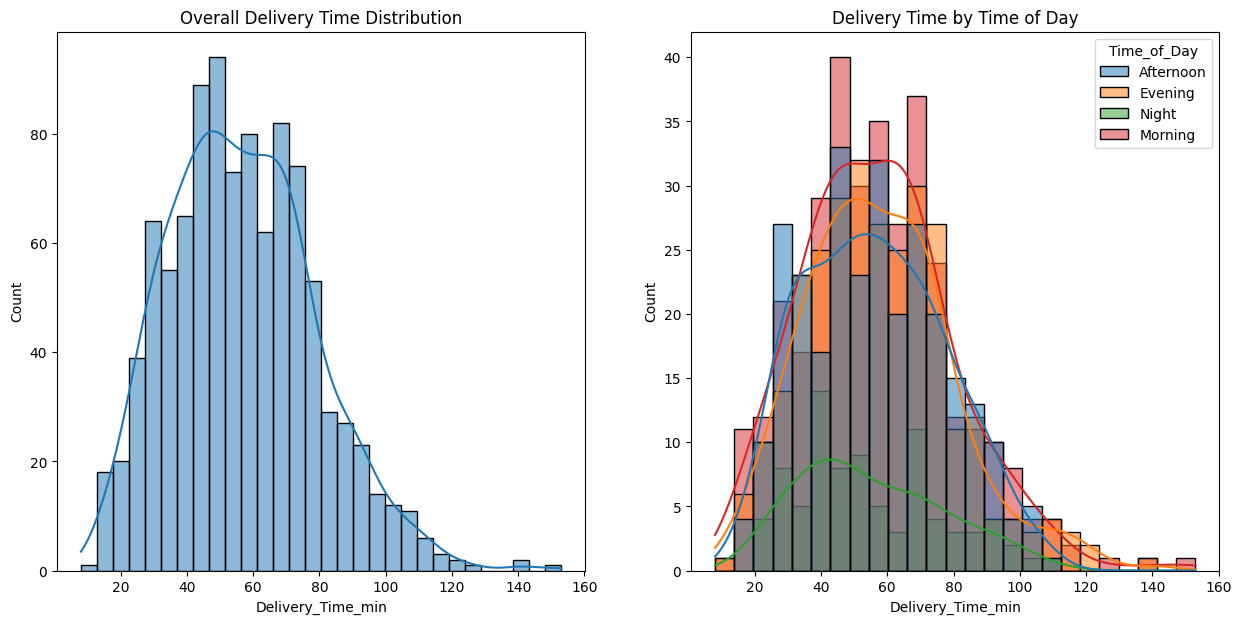

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data=df, x='Delivery_Time_min', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Overall Delivery Time Distribution')

sns.histplot(data=df, x='Delivery_Time_min', kde=True, hue='Time_of_Day', ax=axes[1])
axes[1].set_title('Delivery Time by Time of Day')

plt.show()

#####  Insights
- Morning, Afternoon and Evening periods causes longer delivery times compared to the night, indicating peak-hour congestion effects.

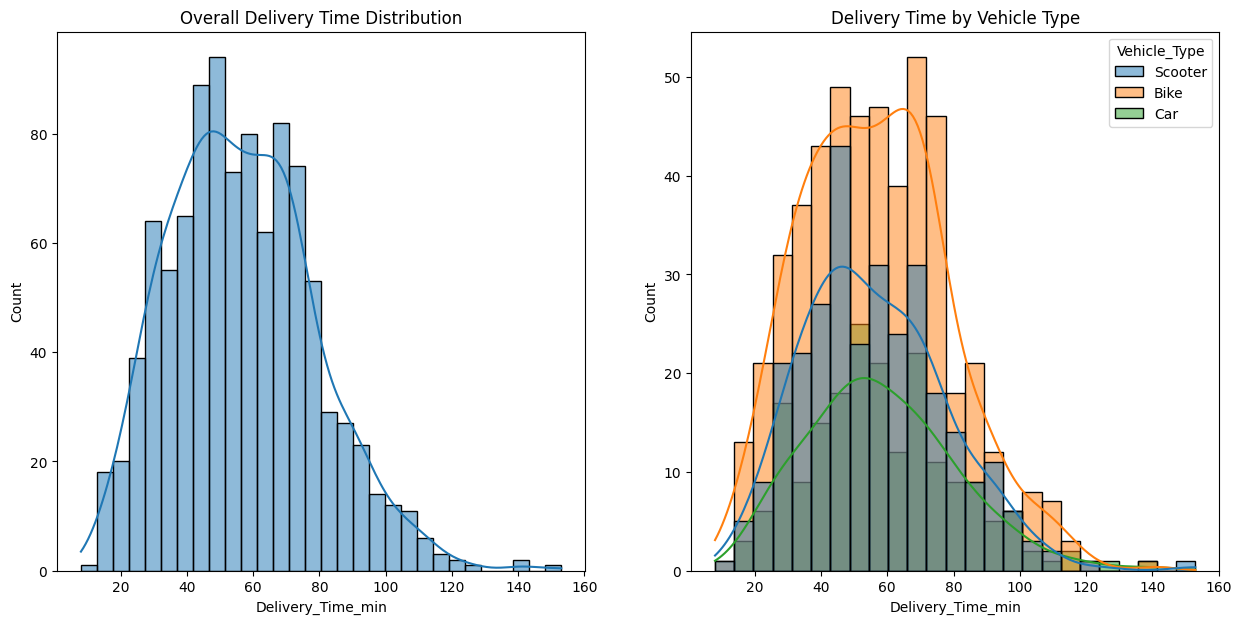

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data=df, x='Delivery_Time_min', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Overall Delivery Time Distribution')

sns.histplot(data=df, x='Delivery_Time_min', kde=True, hue='Vehicle_Type', ax=axes[1])
axes[1].set_title('Delivery Time by Vehicle Type')

plt.show()

#####  Insights
- Bikes and Scooters are the main vehicles used for food delivery, while the use of Cars accounts for the smallest proportion.

#### 4.2 Explore relationship between features and target variable (Delivery_Time_min)
- Scatterplot
- Boxplot
- Bar chart
- Heatmap

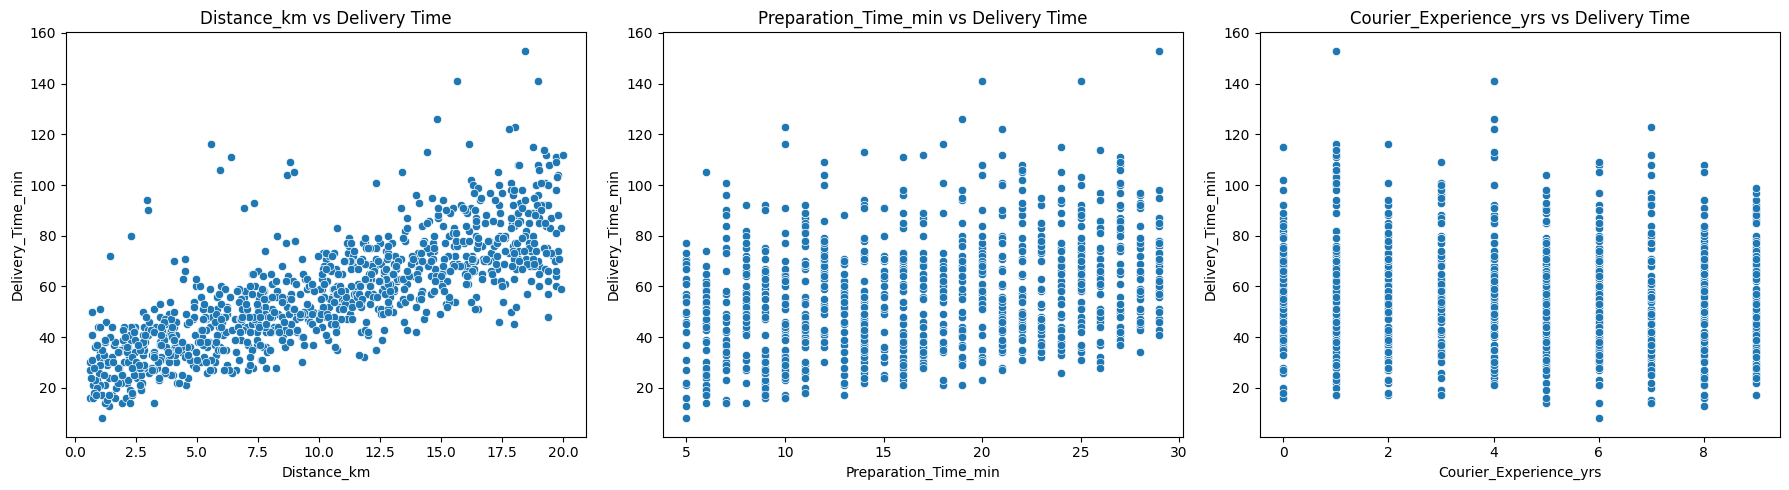

In [70]:
num_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

fig, axes = plt.subplots(1, len(num_cols), figsize=(18, 5))

for i, col in enumerate(num_cols):
    sns.scatterplot(
        x=df[col],
        y=df['Delivery_Time_min'],
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs Delivery Time")

plt.tight_layout()
plt.show()


#####  Insights
- Distance shows a strong positive relationship with delivery time
- Preparation time and Courier experience does not exhibit a clear direct relationship, indicating limited predictive power when considered on its own. (non-linear relationship)

<Axes: xlabel='Courier_Experience_yrs', ylabel='Delivery_Time_min'>

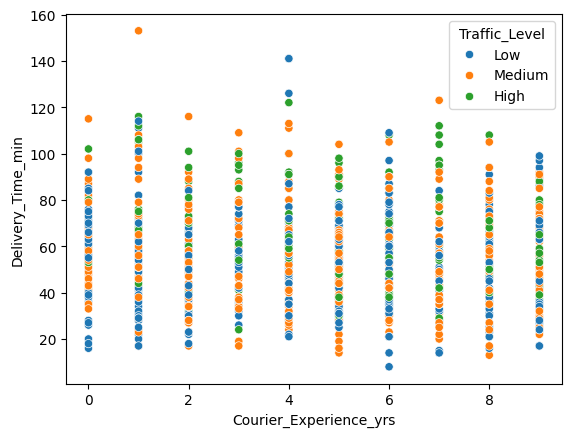

In [74]:
sns.scatterplot(
    data=df,
    x='Courier_Experience_yrs',
    y='Delivery_Time_min',
    hue='Traffic_Level'
)

#####  Insights
- Having a lot of Courier Experience does not guarantee faster delivery in high traffic 

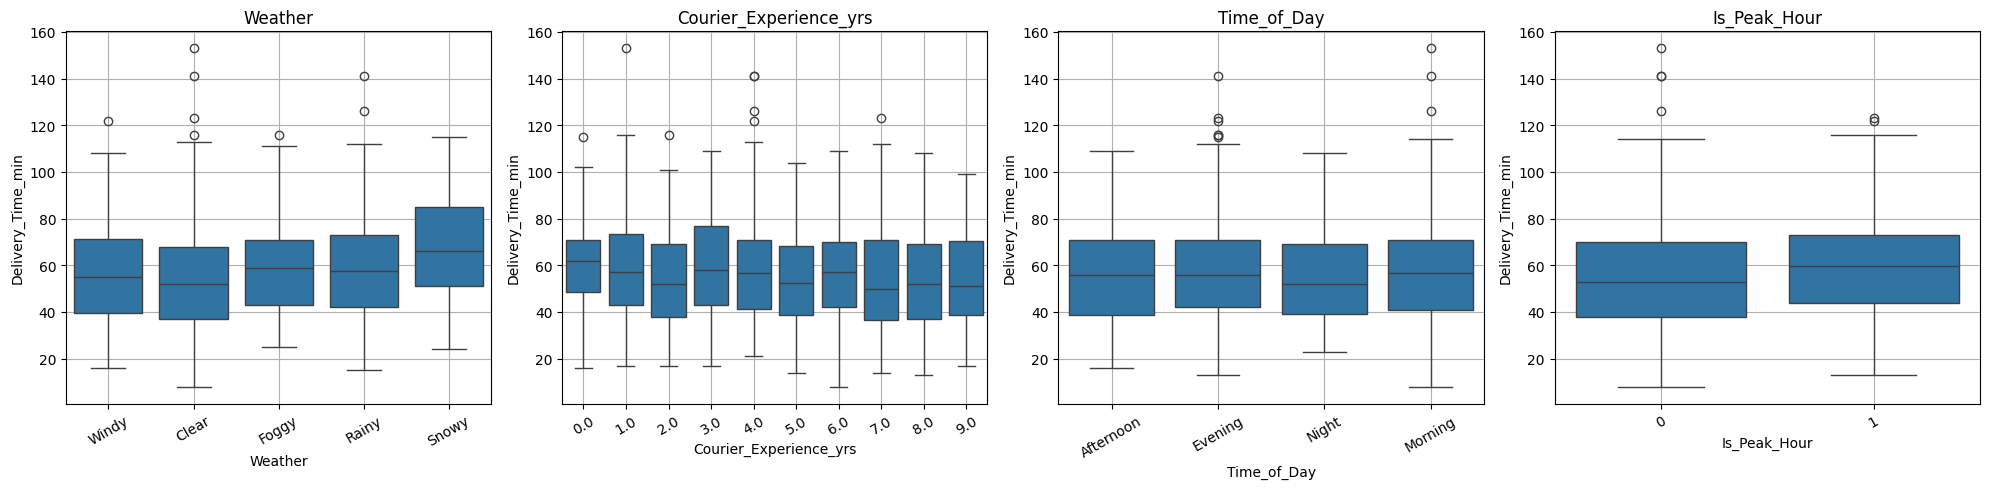

In [71]:
cols = ['Weather', 'Courier_Experience_yrs', 'Time_of_Day', 'Is_Peak_Hour']

fig, axes = plt.subplots(1, len(cols), figsize=(20, 5))

for i, col in enumerate(cols):
    sns.boxplot(
        x=df[col],
        y=df['Delivery_Time_min'],
        ax=axes[i]
    )
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


#####  Insights
- In Clear weather, delivery times are shortest but in Snowy, delivery times are longest.
- Courier experience does not show a clear impact on delivery time.
- In Night period, delivery times are shortest.
- The average food delivery time will increase in Peak Hour.

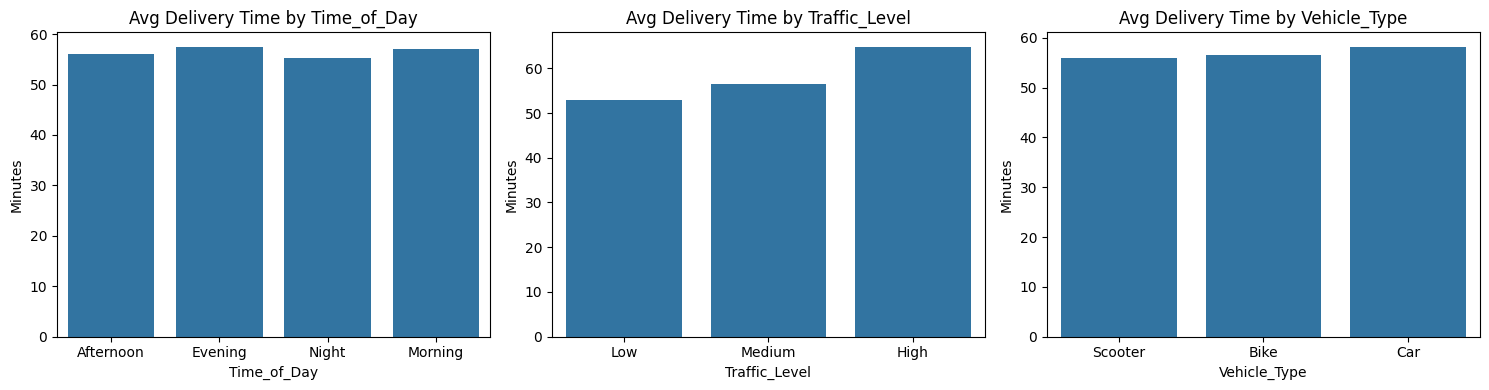

In [73]:
cols = ['Time_of_Day', 'Traffic_Level', 'Vehicle_Type']

fig, axes = plt.subplots(1, len(cols), figsize=(15, 4))

for i, col in enumerate(cols):
    sns.barplot(
        x=col,
        y='Delivery_Time_min',
        data=df,
        errorbar=None,
        ax=axes[i]
    )
    axes[i].set_title(f"Avg Delivery Time by {col}")
    axes[i].set_ylabel("Minutes")

plt.tight_layout()
plt.show()

#####  Insights
- In Night period, delivery times are shortest.
- High Traffic causes delivery times to be longer than Low and Medium.
- Scooters are shortest but Cars are longest.

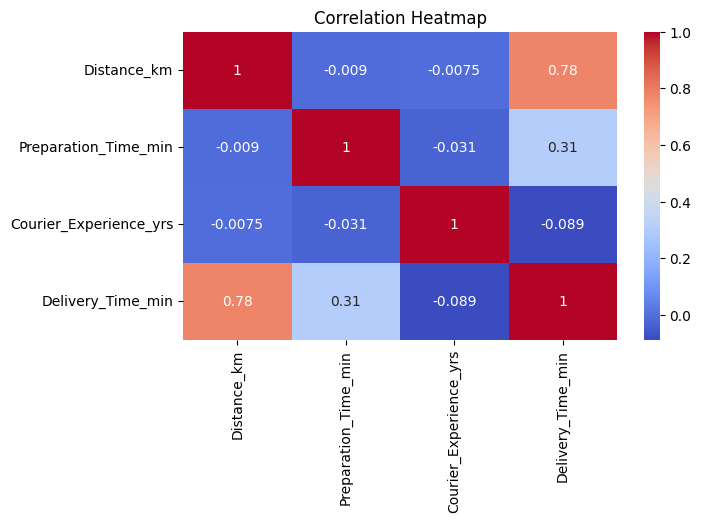

In [14]:
plt.figure(figsize=(7, 4))
sns.heatmap(df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#####  Insights
- Distance is a strong positive correlation with delivery time. This feature is the most important predictor in the model.
- Preparation_Time_min is a moderate positive correlation, its impact is smaller compared to distance.
- Courier_Experience_yrs is a weak negative correlation, no direct effect on delivery time.